<a href="https://colab.research.google.com/github/MikelCerio/2024-Data-Science/blob/main/Copia_de_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importamos todos los paquetes que vayamos a necesitar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Os dejamos en el apartado de datos de Teoría información sobre la vivienda en Boston. Un conjunto de datos con los siguientes campos informados:
#
#     1. CRIM     Crimen per cápita por ciudad
#     2. ZN       Proporción de zona marcada como residencial para espacios superiores 25,000 sq.ft.
#     3. INDUS    Proporción de acres comerciales no minoristas por ciudad
#     4. CHAS     Variable Charles River dummy (= 1 si el trazado limita con el río; 0 otro)
#     5. NOX      Concentración de óxidos nítricos (partes por 10 millones)
#     6. RM       Número medio de habitaciones por vivienda
#     7. AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
#     8. DIS      Distancias ponderadas a cinco centros de empleo de Boston
#     9. RAD      Índice de accesibilidad a las autopistas radiales
#     10. TAX      Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
#     11. PTRATIO  Ratio alumnos-profesor por ciudad
#     12. B        1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
#     13. LSTAT    % estatus inferior de la población
#     14. PRICE    Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston_house_prices.csv')

In [10]:
df_boston = pd.DataFrame(df)

df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
#Analizamos como se distribuyen las variables estadisticamente

print(df_boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Algunas variables tienen una alta dispersión, como CRIM (desviación estándar de 8.6), ZN (desviación estándar de 23.3) y TAX (desviación estándar de 168.5), lo que indica una gran variabilidad entre los vecindarios.

Otras variables, como NOX (desviación estándar de 0.12) y PTRATIO (desviación estándar de 2.16), tienen una menor dispersión, indicando una mayor homogeneidad entre los vecindarios.

Hay variables con distribuciones sesgadas, como CRIM (mínimo de 0.006 y máximo de 88.98) y PRICE (mínimo de 5,000 y máximo de 50,000), donde la mediana se encuentra más cerca del cuartil inferior que del superior.

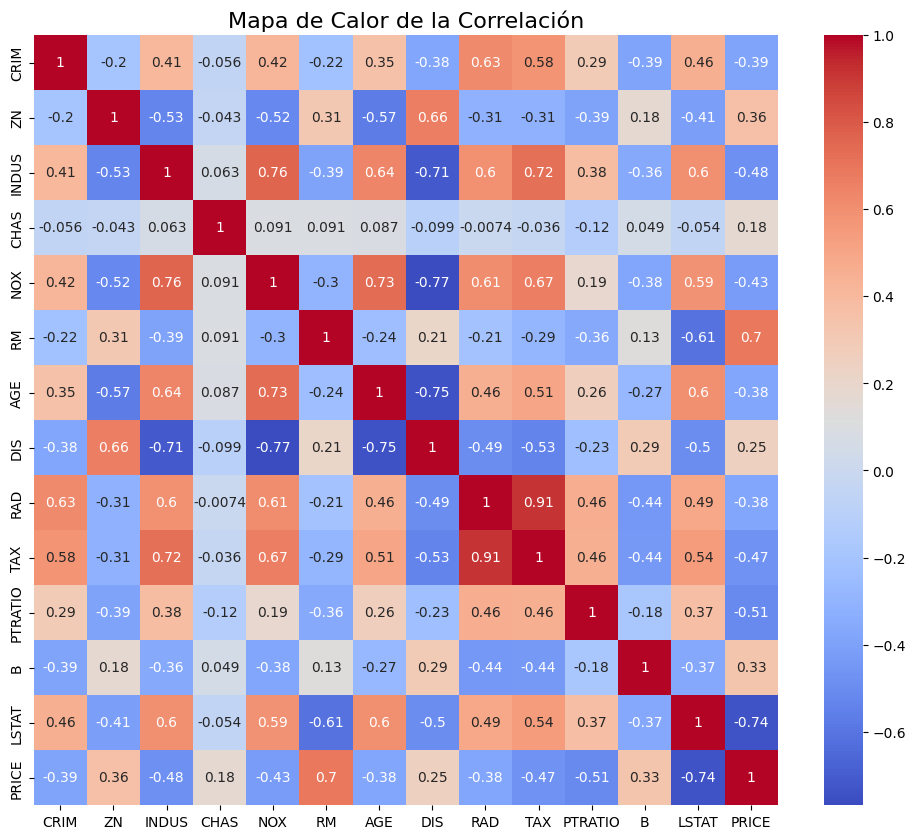

In [13]:
corr = df_boston.corr()

# %%
# Mediante un mapa de calor vamos a ver mejor como son estas correlaciones

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación', fontsize=16)
plt.show()

En este mapa de calor de correlaciones, puedo observar varias correlaciones interesantes y significativas que vale la pena destacar:

1. Correlación fuerte positiva entre RAD (accesibilidad a autopistas radiales) y TAX (impuestos a la propiedad): 0.91
   - Esta alta correlación sugiere que en vecindarios con mejor acceso a las principales autopistas, los impuestos a la propiedad tienden a ser más altos. Esto podría deberse a que estas áreas son más valoradas y tienen propiedades de mayor valor, lo que se traduce en impuestos más altos.

2. Correlación fuerte positiva entre NOX (concentración de óxidos de nitrógeno) e INDUS (proporción de área industrial): 0.76
   - Esta correlación indica que los vecindarios con mayor proporción de área industrial tienden a tener niveles más altos de contaminación por óxidos de nitrógeno. Esto es razonable, ya que las actividades industriales suelen ser una fuente significativa de emisiones de NOX.

3. Correlación fuerte negativa entre AGE (antigüedad de viviendas) y RM (número promedio de habitaciones): -0.77
   - Esta correlación negativa sugiere que las viviendas más antiguas tienden a tener un menor número promedio de habitaciones en comparación con las viviendas más nuevas. Esto podría estar relacionado con los cambios en los estándares de construcción y los estilos arquitectónicos a lo largo del tiempo.

4. Correlación moderada positiva entre RM (número promedio de habitaciones) y PRICE (valor mediano de las viviendas): 0.70
   - Esta correlación indica que, en general, las viviendas con un mayor número de habitaciones tienden a tener un valor más alto en el mercado inmobiliario. Esto tiene sentido, ya que las viviendas más grandes suelen ser más valoradas.

5. Correlación moderada negativa entre LSTAT (porcentaje de población de bajos ingresos) y PRICE (valor mediano de las viviendas): -0.74
   - Esta correlación negativa sugiere que en vecindarios con un mayor porcentaje de población de bajos ingresos, el valor mediano de las viviendas tiende a ser más bajo. Esto puede estar relacionado con factores socioeconómicos y la demanda de viviendas en esas áreas.

6. Relación entre DIS (distancias ponderadas a centros de empleo) y NOX (concentración de óxidos de nitrógeno):-0.77
  - Esto sugiere que en vecindarios con distancias más cortas a los centros de empleo de Boston, la concentración de óxidos de nitrógeno tiende a ser menor.En otras palabras, áreas más cercanas a los centros de empleo pueden tener una mejor calidad del aire en términos de NOX.

7. Relación entre AGE (proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y NOX: 0.73
  - Esto indica que en vecindarios con una mayor proporción de viviendas más antiguas, la concentración de óxidos de nitrógeno tiende a ser más alta.

8. Con un menor grado de correlacion,la correlación entre NOX y TAX es de 0.67

  - Es posible que las áreas con una mayor concentración de NOX tengan una infraestructura más desarrollada y, por lo tanto, impuestos más altos



Estas correlaciones destacadas brindan información valiosa sobre los patrones y relaciones entre las diferentes variables del conjunto de datos. Por ejemplo, las correlaciones con TAX, NOX e INDUS reflejan aspectos de la estructura urbana y el desarrollo de los vecindarios, mientras que las correlaciones con RM y LSTAT están más relacionadas con características de las viviendas y el valor inmobiliario. Comprender estas relaciones puede ser útil para la planificación urbana, el desarrollo de políticas públicas y la toma de decisiones en el sector inmobiliario.

# *MAPAS DE CALOR CORRELACION*

Vamos a realizar diagramas de dispersion de estas correlaciones positivas y negativas.

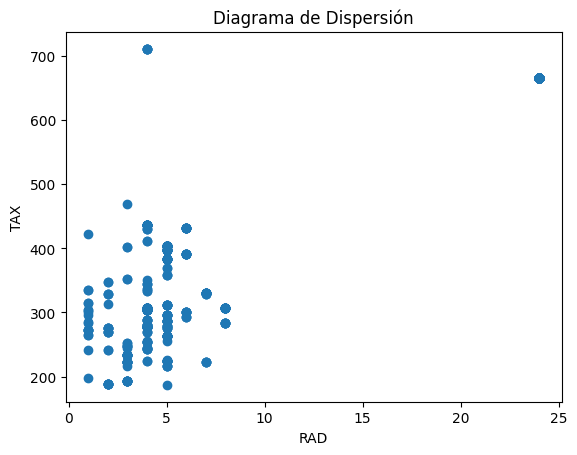

In [15]:
#Diagrama de dispersion entre RAD Y TAX
import matplotlib.pyplot as plt
plt.scatter(df_boston['RAD'], df_boston['TAX'])
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('Diagrama de Dispersión')
plt.show()


La relación entre las dos variables es positiva, por lo tanto se puede decir que la relación entre los impuestos que se pagan y el acceso a la autopista esta relacionado.

Por otro lado se pueden observar un outlier,donde la accesibilidad a las autopistas es alta y los impuestos también son altos. O casas con altos indices de accesabilidad RAD y que pagan pocos impuestos.

Podriamos decir que estas 2 variables estan altamente correlacionadas en terminos de su impacto en los precios de las viviendas.


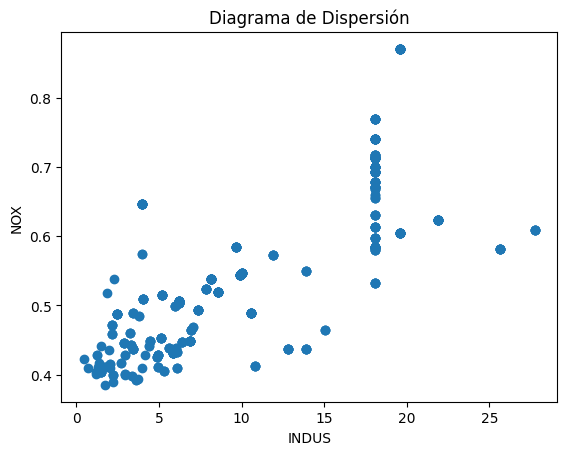

In [16]:
#Diagrama de dispersion entre NOX e INDUS
import matplotlib.pyplot as plt
plt.scatter(df_boston['INDUS'], df_boston['NOX'])
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('Diagrama de Dispersión')
plt.show()

Los vecindarios con mayor proporción de área industrial tienden a tener niveles más altos de contaminación por óxidos de nitrógeno. Estas variables tienen una correlación positiva de 0.76.


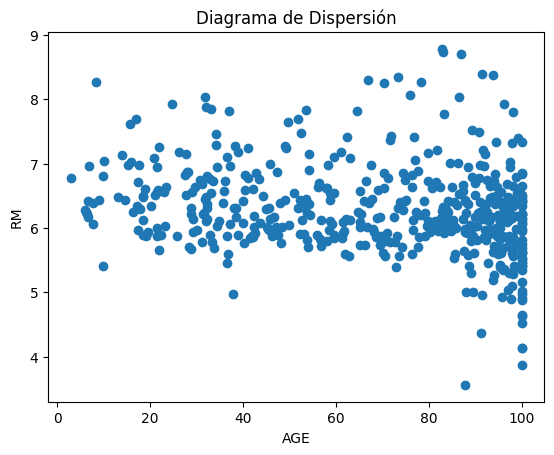

In [17]:
#Diagrama de dispersion entre AGE e RM
import matplotlib.pyplot as plt
plt.scatter(df_boston['AGE'], df_boston['RM'])
plt.xlabel('AGE')
plt.ylabel('RM')
plt.title('Diagrama de Dispersión')
plt.show()

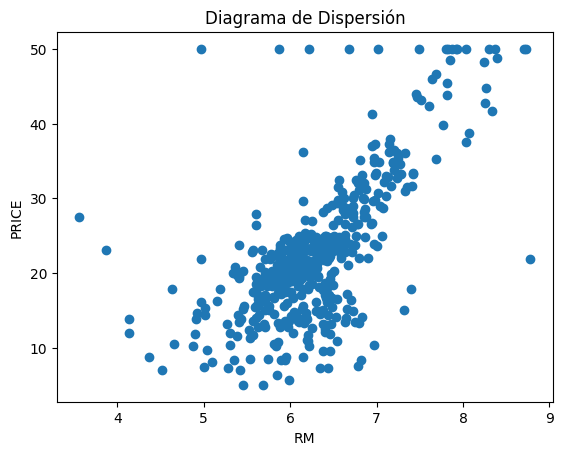

In [18]:
#Diagrama de dispersion entre RM e PRICE
import matplotlib.pyplot as plt
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Diagrama de Dispersión')
plt.show()

En este caso se ve claramente que a medida que el precio de las casas aumenta cuanto mas habitaciones tienen, algo logico. Vemos que hay una concentración de los valores entre 5 a 7 habitaciones y que los precios estan comprendidos entre los 15 y 30 mil dolares.

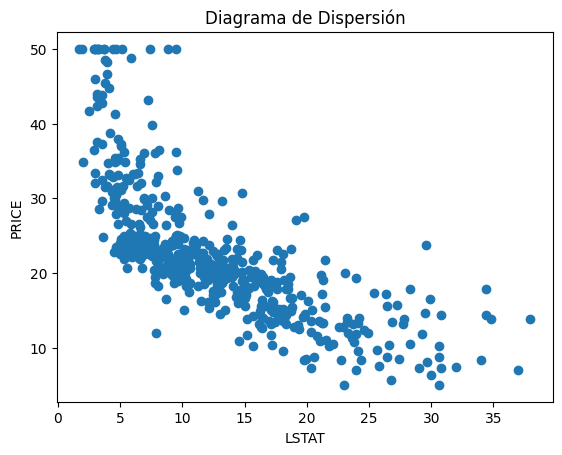

In [19]:
#Diagrama de dispersion entre LSTAT e PRICE
import matplotlib.pyplot as plt
plt.scatter(df_boston['LSTAT'], df_boston['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Diagrama de Dispersión')
plt.show()

Como se puede observar en el diagrama de dispersion a medida que el porcentaje de la poblacion que es considerada inferior en terminos socioeconomicos aumenta, se reducen los precios de venta de las viviendas en esas areas.

# **Distribucion de las casas por precio**:
Vamos a realizar una observacion de como se distribuyen los precios de las casas y si podemos sacar alguna agrupación de los precios de las casas y que caracteristicas comparten.

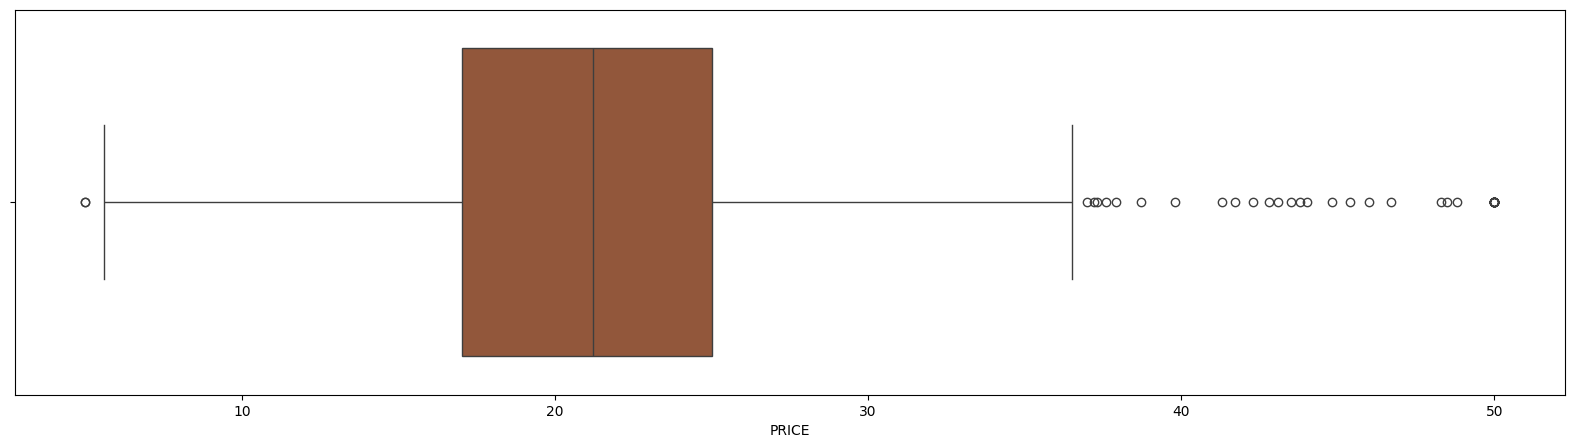

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df_boston["PRICE"], color="sienna");

<ipython-input-22-79747d4f9881>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boston["PRICE"],


<Axes: xlabel='PRICE'>

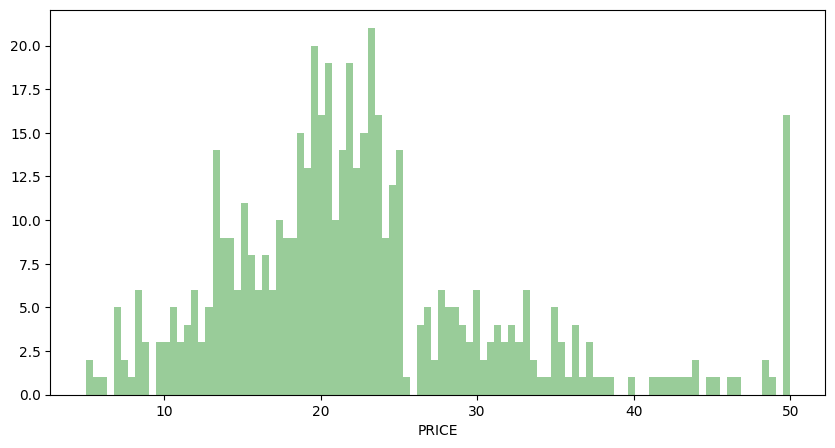

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df_boston["PRICE"],
             kde=False,
             color='g',
             bins=100)

In [28]:
p_0 = np.percentile(df_boston['PRICE'], 0) #Q0 #Min
p_25 = np.percentile(df_boston['PRICE'], 25) #Q1
p_50 = np.percentile(df_boston['PRICE'], 50) #Q2 #Mediana
p_75 = np.percentile(df_boston['PRICE'], 75) #Q3
p_100 = np.percentile(df_boston['PRICE'], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(df_boston['PRICE'].mean(),2) )

Valor del percentil 0: 5.0
Valor del percentil 25: 17.025
Valor del percentil 50: 21.2
Valor del percentil 75: 25.0
Valor del percentil 100: 50.0
Valor media: 22.53


# Observaciones
Podemos observar que los precios de las casas se distribuyen de la siguiente manera.

Se observa que hay una distribucion **sesgada a la derecha**, lo que indica que tiene un sesgo positivo considerable , la mayoria de las casas tienen precios mas bajo.

Por otro lado hay una pequeña cantidad de casas de hasta 50k dolares, en concreto, 16 casas. Me gustaría estudiar que tienen de especial esas casas más adelante. Me imagino que son casas de lujo pero indagaremos más.






# Observaciones Importantes

He querido crear un subgrupo de los precios de acuerdo a lo que marcaban los percentiles mas importantes pero no reflejan los detalles de como se distribuyen ,por lo tanto, en su lugar, una alternativa **podría ser utilizar percentiles más extremos, como el 10, 25, 75 y 90**, para definir las categorías de precios. Esto permitiría identificar de manera más precisa los valores atípicos y las diferentes modas en la distribución.

Por ejemplo, podrías definir las categorías de la siguiente manera:

Bajo: menor que el percentil 25
Medio: entre el percentil 25 y el 75
Alto: entre el percentil 75 y el 90
Muy alto: mayor que el percentil 90

In [84]:
percentil_10 = df_boston['PRICE'].quantile(0.1)
percentil_25 = df_boston['PRICE'].quantile(0.25)
percentil_75 = df_boston['PRICE'].quantile(0.75)
percentil_90 = df_boston['PRICE'].quantile(0.9)

# Definir los rangos y etiquetas
bins = [-float('inf'), percentil_25, percentil_75, percentil_90, float('inf')]
etiquetas = ['Bajo', 'Medio', 'Alto', 'Muy Alto']

# Crear la nueva columna categórica
df_boston['Categoria_Precio'] = pd.cut(df_boston['PRICE'], bins=bins, labels=etiquetas)

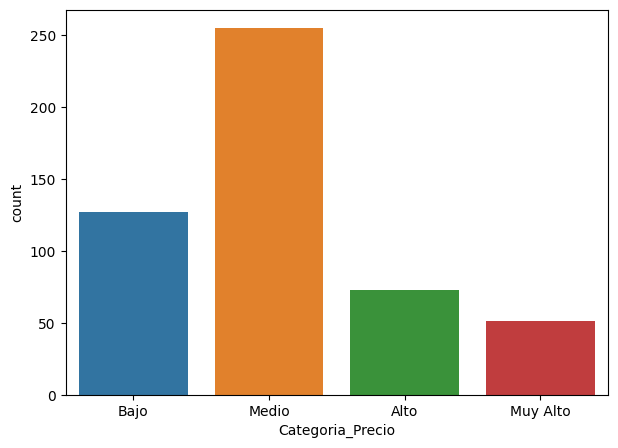

In [86]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_boston['Categoria_Precio'], hue=df_boston['Categoria_Precio']);

In [87]:
df_boston[df_boston['Categoria_Precio'] == 'Muy Alto'].head(10).sort_values(by='PRICE', ascending=False)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Categoria_Precio
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0,Muy Alto
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0,Muy Alto
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,Muy Alto
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,Muy Alto
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,Muy Alto
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3,Muy Alto
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,Muy Alto
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Muy Alto
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4,Muy Alto
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9,Muy Alto


Se observan muchas viviendas de 50 mil dolares o más y me gustaria saber que las hace tan especiales. Vamos a analizar sus variables, sobre todo en temas de Criminalidad.


In [58]:
casas_50k = df_boston[df_boston['PRICE'] == 50]
cantidad_casas_50k = casas_50k.shape[0]
cantidad_casas_50k

16

Hay un total de 16 casas de 50k dolares.


In [59]:
casas_50k.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0
25%,0.409203,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0
